In [1]:
import cv2 #Loads an image from the specified file

In [2]:
from deepface import DeepFace #face recognition framework(pretrained)

In [3]:
img = cv2.imread('happy.jpg')

In [4]:
import matplotlib.pyplot as plt #plotting library of python(Data visualization for 2D array)

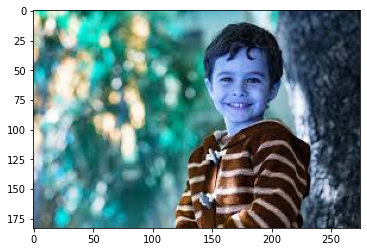

In [5]:
plt.imshow(img)  #BGR

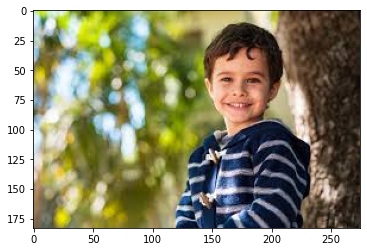

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #convert an image from one colour space to another

In [7]:
predictions = DeepFace.analyze(img) #provides a lot of facial attribute analysis features

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:04<00:14,  4.93s/it]

1/1 [==============================] - 1s 1000ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:06<00:05,  2.70s/it]

1/1 [==============================] - 1s 845ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:07<00:01,  1.92s/it]

1/1 [==============================] - 1s 746ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.97s/it]


In [8]:
predictions

{'emotion': {'angry': 4.080704090608789e-10,
  'disgust': 2.3995032556461558e-14,
  'fear': 9.624874681979367e-11,
  'happy': 99.93354678153992,
  'sad': 1.5499276528885275e-06,
  'surprise': 1.8699708448366437e-08,
  'neutral': 0.06645280518569052},
 'dominant_emotion': 'happy',
 'region': {'x': 141, 'y': 34, 'w': 63, 'h': 63},
 'age': 15,
 'gender': 'Man',
 'race': {'asian': 3.2730549397403075,
  'indian': 0.15541709038113471,
  'black': 0.012963391692085064,
  'white': 72.36777873423353,
  'middle eastern': 5.691889367474393,
  'latino hispanic': 18.49889385713412},
 'dominant_race': 'white'}

In [9]:
type(predictions)

dict

In [10]:
predictions['dominant_emotion']

'happy'

# We are tryin to draw rectangle across the face

In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Haar Cascade is a machine learning-based approach where a lot of positive and negative images are used to train the classifier. Positive images – These images contain the images which we want our classifier to identify. Negative Images – Images of everything else, which do not contain the object we want to detect.
#It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. Here we will work with face detection.

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

#draw a rectangle around the face

for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

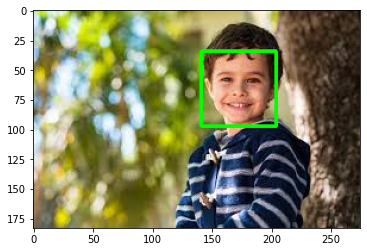

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX

#use putText() method for
#inserting text on video

cv2.putText(img,
           predictions['dominant_emotion'],
           (0,50),
           font, 1,
           (0,0,255),
           2,
           cv2.LINE_4) ;

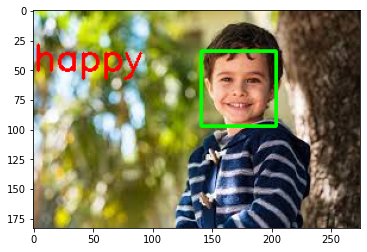

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Real time video for Face Emotion Recognition

In [17]:
import cv2
from deepface import DeepFace
cam = cv2.VideoCapture(0)  #to capture live stream with the camera

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:

    ret, frame = cam.read() #ret is bool variabloe that returns true if the frame is avialable
                            #frame is a image array vector capture based on FPS 
    print(ret)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
   
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    predictions = DeepFace.analyze(frame, enforce_detection=False)
    font = cv2.FONT_HERSHEY_SIMPLEX      #Font Scale factor 
     #Used to draw text on images
    cv2.putText(frame, "FPS: {}".format(cam.get(cv2.CAP_PROP_FPS)), (0,100), font, 1, (0, 255, 255), 2, cv2.LINE_4) 
    cv2.putText(frame, 'Press q to quit', (200,300), font, 1, (0, 255, 255), 2, cv2.LINE_4)
    cv2.putText(frame,predictions['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Original video',frame)
    #cv2.imshow("ERS Visual V1.0 - Emotion Recognition System", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  #ord function converts the character into integer
        break                              #waitkey allow user to display a window for given miliseconds.
                                           #if 0 is passed in the argument it waits till any key is pressed

cam.release()
cv2.destroyAllWindows()
quit()

True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 63ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.12it/s]

1/1 [==============================] - 0s 459ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.82it/s]

1/1 [==============================] - 0s 474ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.78it/s]

1/1 [==============================] - 1s 571ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.72it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  4.90it/s]

1/1 [==============================] - 0s 330ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.70it/s]

1/1 [==============================] - 0s 394ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.46it/s]

1/1 [==============================] - 0s 384ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.53it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  5.18it/s]

1/1 [==============================] - 0s 290ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.52it/s]

1/1 [==============================] - 0s 259ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.82it/s]

1/1 [==============================] - 0s 366ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.72it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  5.33it/s]

1/1 [==============================] - 0s 311ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.87it/s]

1/1 [==============================] - 0s 249ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  3.07it/s]

1/1 [==============================] - 0s 441ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.77it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  4.74it/s]

1/1 [==============================] - 0s 274ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.80it/s]

1/1 [==============================] - 0s 420ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.34it/s]

1/1 [==============================] - 0s 422ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.74it/s]

1/1 [==============================] - 0s 379ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.76it/s]

1/1 [==============================] - 0s 430ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.38it/s]

1/1 [==============================] - 0s 384ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.49it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 75ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.03it/s]

1/1 [==============================] - 1s 519ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.55it/s]

1/1 [==============================] - 1s 503ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.61it/s]

1/1 [==============================] - 0s 492ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.66it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.53it/s]

1/1 [==============================] - 0s 398ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.02it/s]

1/1 [==============================] - 1s 535ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.79it/s]

1/1 [==============================] - 1s 544ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.82it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 61ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.28it/s]

1/1 [==============================] - 1s 517ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.55it/s]

1/1 [==============================] - 0s 491ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.57it/s]

1/1 [==============================] - 0s 494ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.67it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:01,  2.72it/s]

1/1 [==============================] - 1s 526ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.56it/s]

1/1 [==============================] - 1s 515ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.62it/s]

1/1 [==============================] - 0s 479ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.69it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.67it/s]

1/1 [==============================] - 0s 471ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.82it/s]

1/1 [==============================] - 0s 437ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.82it/s]

1/1 [==============================] - 0s 471ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.87it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.31it/s]

1/1 [==============================] - 0s 399ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:01,  1.88it/s]

1/1 [==============================] - 0s 457ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.85it/s]

1/1 [==============================] - 0s 472ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.88it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.48it/s]

1/1 [==============================] - 1s 512ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.66it/s]

1/1 [==============================] - 0s 476ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.64it/s]

1/1 [==============================] - 0s 498ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.72it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 59ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.38it/s]

1/1 [==============================] - 0s 489ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.71it/s]

1/1 [==============================] - 1s 516ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  1.66it/s]

1/1 [==============================] - 0s 343ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.86it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  7.13it/s]

1/1 [==============================] - 0s 248ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.38it/s]

1/1 [==============================] - 0s 300ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  3.16it/s]

1/1 [==============================] - 0s 267ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.35it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.11it/s]

1/1 [==============================] - 0s 261ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.28it/s]

1/1 [==============================] - 0s 238ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  3.38it/s]

1/1 [==============================] - 0s 243ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.52it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  5.97it/s]

1/1 [==============================] - 0s 241ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.48it/s]

1/1 [==============================] - 0s 328ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  3.02it/s]

1/1 [==============================] - 0s 288ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.19it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  7.08it/s]

1/1 [==============================] - 0s 343ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.92it/s]

1/1 [==============================] - 0s 346ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.74it/s]

1/1 [==============================] - 0s 381ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.73it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  7.35it/s]

1/1 [==============================] - 0s 239ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.78it/s]

1/1 [==============================] - 0s 242ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  3.64it/s]

1/1 [==============================] - 0s 365ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.29it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  5.96it/s]

1/1 [==============================] - 0s 328ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.92it/s]

1/1 [==============================] - 0s 303ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.82it/s]

1/1 [==============================] - 0s 345ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.84it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.32it/s]

1/1 [==============================] - 0s 251ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.39it/s]

1/1 [==============================] - 0s 266ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  3.31it/s]

1/1 [==============================] - 0s 314ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.26it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.71it/s]

1/1 [==============================] - 0s 286ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.23it/s]

1/1 [==============================] - 0s 348ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  2.86it/s]

1/1 [==============================] - 0s 245ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.18it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  4.72it/s]

1/1 [==============================] - 0s 374ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.28it/s]

1/1 [==============================] - 0s 391ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.26it/s]

1/1 [==============================] - 0s 381ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.36it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  7.03it/s]

1/1 [==============================] - 0s 322ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.10it/s]

1/1 [==============================] - 0s 378ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.64it/s]

1/1 [==============================] - 0s 244ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.04it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  7.31it/s]

1/1 [==============================] - 0s 332ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.81it/s]

1/1 [==============================] - 0s 314ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.79it/s]

1/1 [==============================] - 0s 372ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.80it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.28it/s]

1/1 [==============================] - 0s 248ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.38it/s]

1/1 [==============================] - 0s 355ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  2.82it/s]

1/1 [==============================] - 0s 272ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.05it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  4.95it/s]

1/1 [==============================] - 0s 337ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.69it/s]

1/1 [==============================] - 0s 341ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.63it/s]

1/1 [==============================] - 0s 405ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.56it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  5.98it/s]

1/1 [==============================] - 0s 290ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.14it/s]

1/1 [==============================] - 0s 329ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  2.93it/s]

1/1 [==============================] - 0s 286ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.09it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.56it/s]

1/1 [==============================] - 0s 249ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.37it/s]

1/1 [==============================] - 0s 344ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  2.86it/s]

1/1 [==============================] - 0s 267ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.12it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.21it/s]

1/1 [==============================] - 0s 260ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.30it/s]

1/1 [==============================] - 0s 369ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.74it/s]

1/1 [==============================] - 0s 244ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.12it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  6.34it/s]

1/1 [==============================] - 0s 266ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.99it/s]

1/1 [==============================] - 0s 325ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.79it/s]

1/1 [==============================] - 0s 241ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.10it/s]


True


Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  7.30it/s]

1/1 [==============================] - 0s 353ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.87it/s]

1/1 [==============================] - 0s 359ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.59it/s]

1/1 [==============================] - 0s 238ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.95it/s]
